## Lab 4: Unsupervised Learning


Dataset: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data


Steps:
1. PCA implementation
2. K-means implementation

Then:

3. Exp1: Cluster using k-means + apply elbow method
4. Exp2: Cluster using PCA then k-means + apply elbow method
5. Apply Elbow Method for both experiments
6. Calculate errors for both experiments
7. Try different numbers of PC


8. OG labels VS output
9. Validate via PCA sklearn


Resources:
1.

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler


1. Preprocessing Dataset

In [53]:
df = pd.read_csv("data.csv")


print(df.shape)

df = df.drop(columns=['Unnamed: 32']) 

print(df.shape)

(569, 33)
(569, 32)


In [54]:
missing_values = df.isnull().sum()
df.shape

(569, 32)

In [55]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [56]:
df = df.drop(columns='id') #dropping id
df.shape

(569, 31)

In [57]:
labels = df['diagnosis']
df = df.drop(columns='diagnosis')

In [46]:
print(df.shape)
df.dtypes

(569, 30)


radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst      

array([[<Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>],
       [<Axes: title={'center': 'radius_se'}>,
        <Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>],
       [<Axes: title={'center': 'compactness_se'}>,
        <Axes: title={'center': 'concavity_se'}>,
        <Axes: title={'center': 'concave points_se'}>,
        <Axes: title={'center': 'symmetry_se'}>,
        <Axes: title={'ce

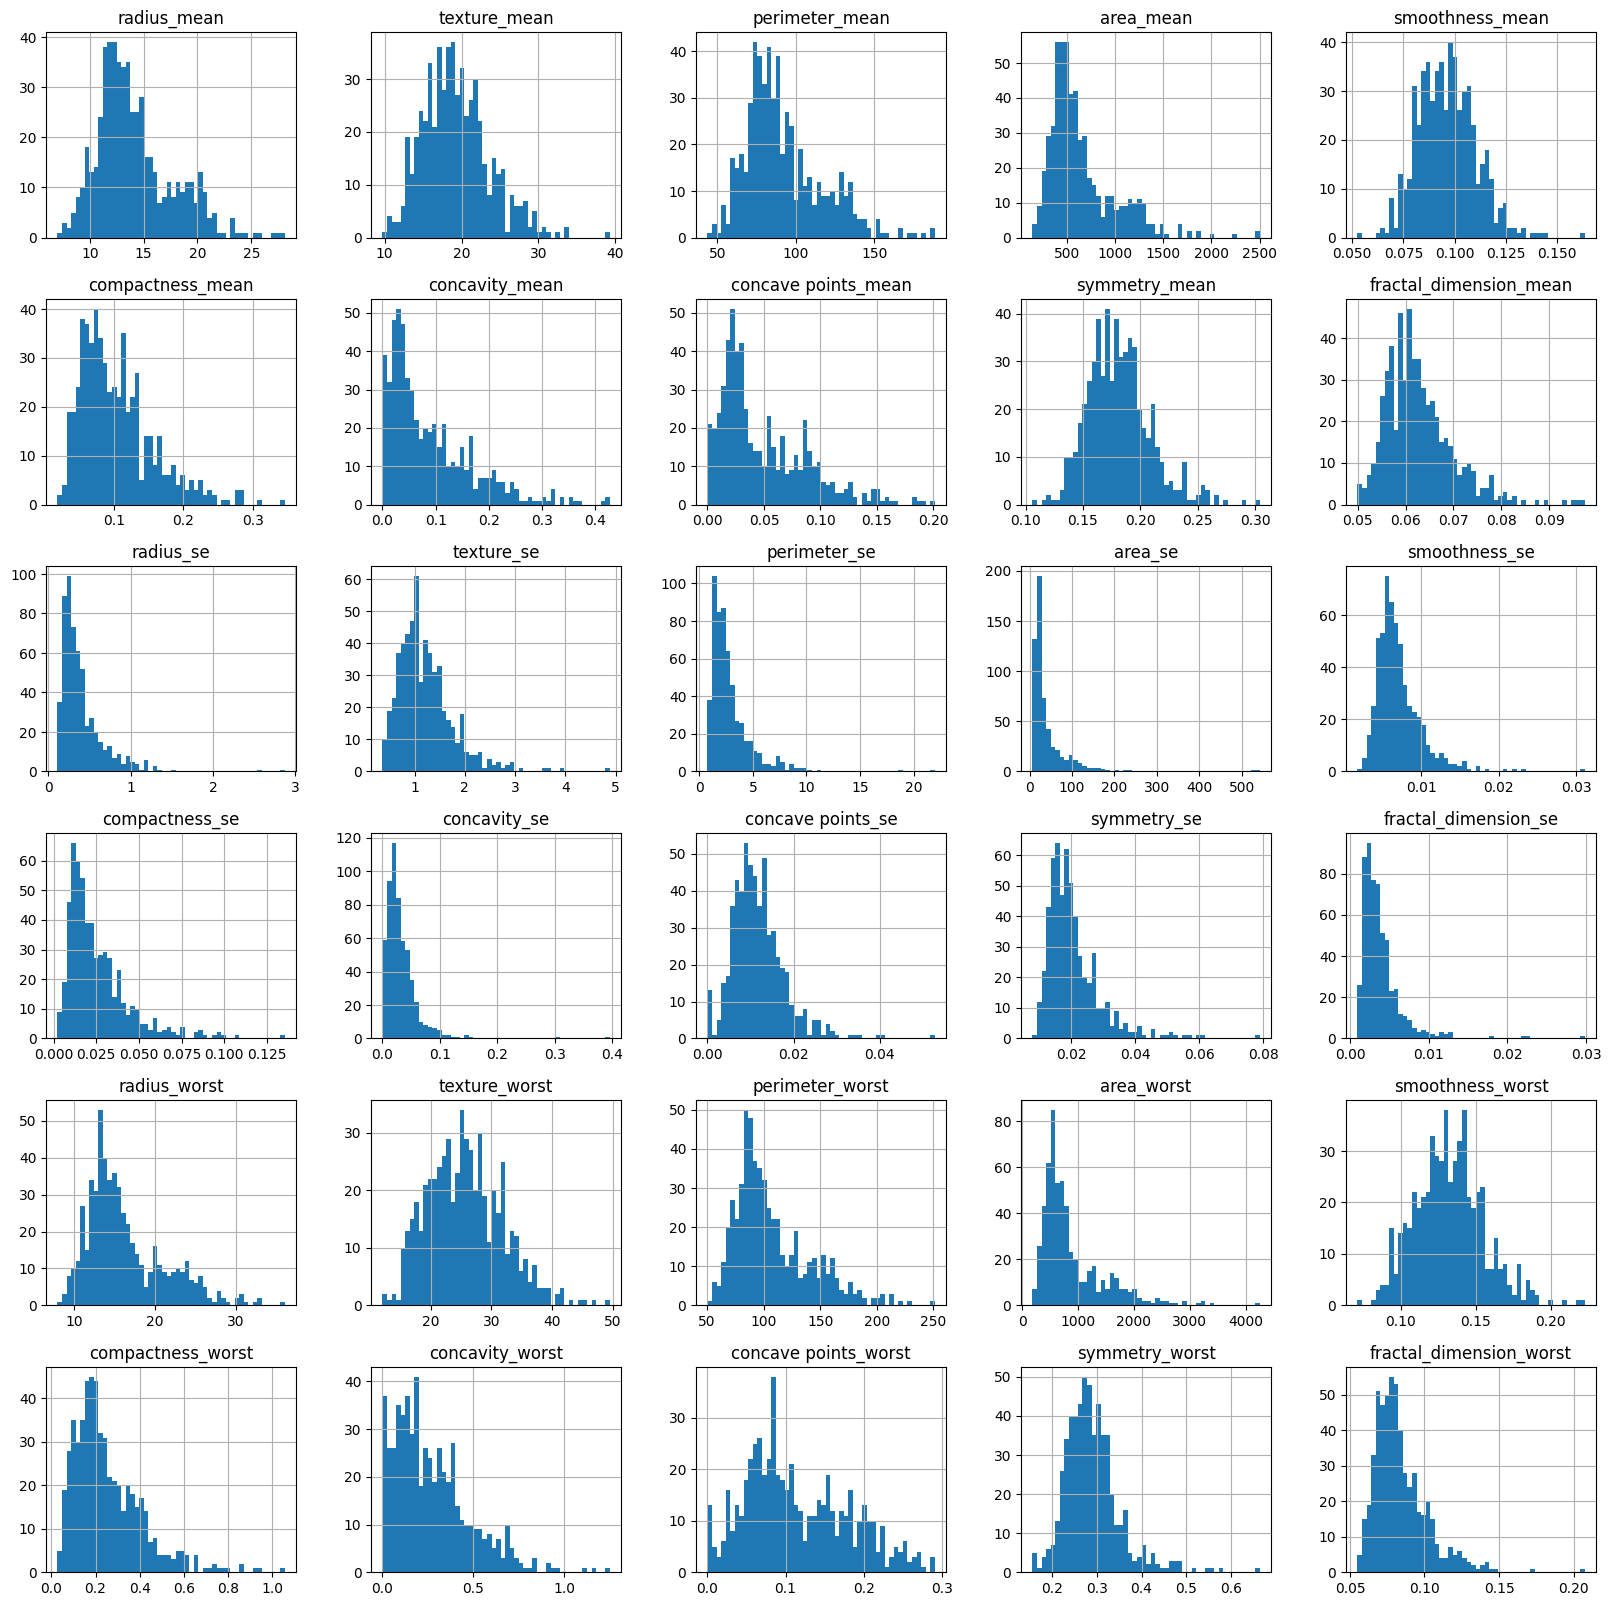

In [58]:
df.hist(bins=50, figsize=(20,20))

#### Now, we'll be working with 30 features
 1. Scaling since PCA is sensitive to the scale of data

## **1. PCA Implementation** (PCA COMPONENT ANALYSIS)

Steps:
1. Standardize data (normalization + feature scaling)
2. Compute covariance matrix
3. Eigen Decomposition
4. Sort by eigenvalues
5. Choose eigen vectors

In [106]:
class PCA:
    
    def __init__(self, k_components):
        self.k_components = k_components   
        
    def fit(self, X):

        # Standardize data 
        X = X.copy()
        self.mean = np.mean(X, axis = 0)
        self.scale = np.std(X, axis = 0)
        self.scale[self.scale == 0] = 1
        X_std = (X - self.mean) / self.scale
        
        # Eigendecomposition of covariance matrix       
        cov_mat = np.cov(X_std.T)
        eig_vals, eig_vecs = np.linalg.eig(cov_mat) 
        
        # Adjusting the eigenvectors that are largest in absolute value to be positive    
        max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
        signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
        eig_vecs = eig_vecs*signs[np.newaxis,:]
        eig_vecs = eig_vecs.T
       
        eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i,:]) for i in range(len(eig_vals))]
        eig_pairs.sort(key=lambda x: x[0], reverse=True)
        
        eig_vals_sorted = np.array([x[0] for x in eig_pairs])
        eig_vecs_sorted = np.array([x[1] for x in eig_pairs])
        
        self.components = eig_vecs_sorted[:self.k_components,:]
        
        # Explained variance ratio: when components = n, ad eh men el original variance is captured ***
        self.explained_variance_ratio = [i/np.sum(eig_vals) for i in eig_vals_sorted[:self.k_components]]
        # same as "up" but for all components together
        self.cum_explained_variance = np.cumsum(self.explained_variance_ratio)

        return self

    def transform(self, X):
        X = X.copy()
        X_std = (X - self.mean) / self.scale
        X_proj = X_std.dot(self.components.T)
        
        return X_proj


In [101]:
scaler = StandardScaler()
df = scaler.fit_transform(df)

scaler = MinMaxScaler()
df = scaler.fit_transform(df)

In [ ]:
my_pca = PCA(k_components = 2).fit(df)

print('Components:\n', my_pca.components)
print('Explained variance ratio from scratch:\n', my_pca.explained_variance_ratio)
print('Cumulative explained variance from scratch:\n', my_pca.cum_explained_variance)

X_proj_my_pca = my_pca.transform(df)
print('Transformed data shape from scratch:', X_proj_my_pca.shape)

Components:
 [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]
Explained variance ratio from scratch:
 [0.4427202560752636, 0.18971182044033072]
Cumulative explained variance from scratch:
 [0.44272026 0.63243208]
Transformed data shape from scratch: (569, 2)


In [114]:
from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components=2)
sklearn_pca.fit(df)
print("Explained variance ratio (sklearn):", sklearn_pca.explained_variance_ratio_)

# Transform the data using sklearn's PCA
X_proj_sklearn = sklearn_pca.transform(df)


Explained variance ratio (sklearn): [0.53097689 0.1728349 ]


Comparison between custom PCA and scikit PCA

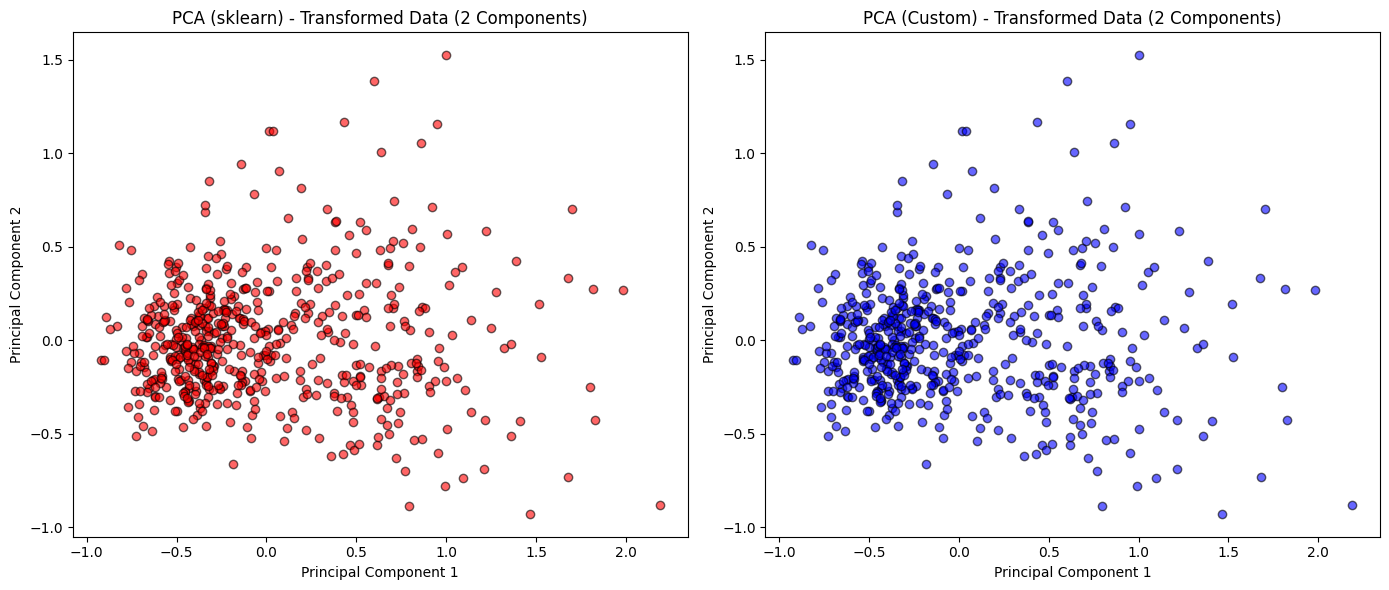

In [116]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot transformed data from sklearn's PCA
axes[0].scatter(X_proj_sklearn[:, 0], X_proj_sklearn[:, 1], c='red', edgecolor='k', alpha=0.6)
axes[0].set_title('PCA (sklearn) - Transformed Data (2 Components)')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')

# Plot transformed data from custom PCA
axes[1].scatter(X_proj_my_pca[:, 0], X_proj_my_pca[:, 1], c='blue', edgecolor='k', alpha=0.6)
axes[1].set_title('PCA (Custom) - Transformed Data (2 Components)')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


## **2. K-MEANS IMPLEMENTATION**

In [2]:
class KMeans:
    def __init__(self, n_clusters, max_iter=300):

        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None
        self.labels = None

    def fit(self, X):
        # centroids init
        np.random.seed(42)  # (for reproducibility??)
        random_indices = np.random.permutation(X.shape[0])[:self.n_clusters]
        self.centroids = X[random_indices]

        for _ in range(self.max_iter):
            # point to nearest centroid
            distances = self._compute_distances(X)
            self.labels = np.argmin(distances, axis=1)

            # centroids are mean of assigned points
            new_centroids = np.array([
                X[self.labels == k].mean(axis=0) if np.any(self.labels == k) else self.centroids[k]
                for k in range(self.n_clusters)
            ])

            # if no change in centroids
            if np.all(new_centroids == self.centroids):
                break

            self.centroids = new_centroids

    def _compute_distances(self, X):
        return np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)

    def predict(self, X):
        distances = self._compute_distances(X)
        return np.argmin(distances, axis=1)


## Example to  make sure the class is correct 

will remove it when adding experiments 1 and 2

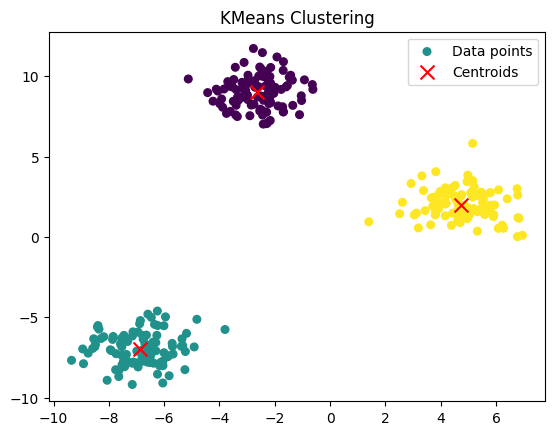

In [5]:
# Example dataset
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate data
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

# Apply KMeans
kmeans = KMeans(n_clusters=3, max_iter=100)
kmeans.fit(X)
labels = kmeans.labels
centroids = kmeans.centroids

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30, label="Data points")
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label="Centroids")
plt.title("KMeans Clustering")
plt.legend()
plt.show()
